In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import graphviz 

In [2]:
data = pd.read_csv('C:\\Users\\shermaap\\Documents\\Class Folders\\Winter 2023-2024\\MA384\\CVD_Cleaned.csv')
data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
data.shape

(308854, 19)

### Data Exploration

# Univariate Analysis
# Check the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

# Multivariate Analysis
# Analyze the relationship between disease conditions, general health, and age category

plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='General_Health', hue=disease)
    plt.title('Distribution of ' + disease + ' by General Health')
    plt.xticks(rotation=90)
    plt.show()

### Data Cleaning

In [4]:
data.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


In [5]:
# Check for missing values in each column
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

# Check for outliers
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [6]:
# Summary statistics
#summary_stats = data[numerical_cols].describe()
#summary_stats

In [7]:
data.size

5868226

In [8]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [9]:
# Remove duplicate rows
data = data.drop_duplicates()

In [10]:
data.size

5866706

### Data Preparation

In [11]:
# BMI Category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Overweight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,Obesity
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Overweight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,Normal weight


In [12]:
# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,Underweight,2.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Overweight,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,Obesity,4.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Overweight,4.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,Normal weight,4.0


In [13]:
# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
#data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

#data.head(5)

In [14]:
# Healthy Diet Score
#data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

#data.head(5)

In [15]:
# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,14.54,Yes,0.0,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,28.29,No,0.0,30.0,0.0,4.0,Overweight,4.0,0.0,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,33.47,No,4.0,12.0,3.0,16.0,Obesity,4.0,0.0,4.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,28.73,No,0.0,30.0,30.0,8.0,Overweight,4.0,0.0,4.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,24.37,Yes,0.0,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0


In [16]:
# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,14.54,Yes,0.0,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,28.29,No,0.0,30.0,0.0,4.0,Overweight,4.0,0.0,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,33.47,No,4.0,12.0,3.0,16.0,Obesity,4.0,0.0,4.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,28.73,No,0.0,30.0,30.0,8.0,Overweight,4.0,0.0,4.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,24.37,Yes,0.0,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0


In [17]:
# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,Yes,0.0,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0,4.592774
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,No,0.0,30.0,0.0,4.0,Overweight,4.0,0.0,0.0,2.139800
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,No,4.0,12.0,3.0,16.0,Obesity,4.0,0.0,4.0,1.842849
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,No,0.0,30.0,30.0,8.0,Overweight,4.0,0.0,4.0,1.926370
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,Yes,0.0,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0,2.159412


In [18]:
# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,0.0,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0,4.592774,480.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,0.0,30.0,0.0,4.0,Overweight,4.0,0.0,0.0,2.139800,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,4.0,12.0,3.0,16.0,Obesity,4.0,0.0,4.0,1.842849,36.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,0.0,30.0,30.0,8.0,Overweight,4.0,0.0,4.0,1.926370,900.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,0.0,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0,2.159412,32.0


In [19]:
# Healthy_Diet_Lifestyle Interaction
#data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

#data.head(5)

In [20]:
# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0,4.592774,480.0,0.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,30.0,0.0,4.0,Overweight,4.0,0.0,0.0,2.139800,0.0,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,12.0,3.0,16.0,Obesity,4.0,0.0,4.0,1.842849,36.0,64.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,30.0,30.0,8.0,Overweight,4.0,0.0,4.0,1.926370,900.0,0.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0,2.159412,32.0,0.0


### Feature Processing

In [21]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato
0,Poor,Within the past 2 years,No,No,No,No,No,0,Yes,Female,...,30.0,16.0,12.0,Underweight,2.0,-0.0,0.0,4.592774,480.0,0.0
1,Very Good,Within the past year,No,Yes,No,No,No,1,No,Female,...,30.0,0.0,4.0,Overweight,4.0,0.0,0.0,2.139800,0.0,0.0
2,Very Good,Within the past year,Yes,No,No,No,No,1,No,Female,...,12.0,3.0,16.0,Obesity,4.0,0.0,4.0,1.842849,36.0,64.0
3,Poor,Within the past year,Yes,Yes,No,No,No,1,No,Male,...,30.0,30.0,8.0,Overweight,4.0,0.0,4.0,1.926370,900.0,0.0
4,Good,Within the past year,No,No,No,No,No,0,No,Male,...,8.0,4.0,0.0,Normal weight,4.0,-0.0,0.0,2.159412,32.0,0.0


In [22]:
# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,Poor,Within the past 2 years,No,No,No,No,No,0,Yes,70-74,...,12.0,Underweight,2.0,-0.0,0.0,4.592774,480.0,0.0,True,False
1,Very Good,Within the past year,No,Yes,No,No,No,1,No,70-74,...,4.0,Overweight,4.0,0.0,0.0,2.139800,0.0,0.0,True,False
2,Very Good,Within the past year,Yes,No,No,No,No,1,No,60-64,...,16.0,Obesity,4.0,0.0,4.0,1.842849,36.0,64.0,True,False
3,Poor,Within the past year,Yes,Yes,No,No,No,1,No,75-79,...,8.0,Overweight,4.0,0.0,4.0,1.926370,900.0,0.0,False,True
4,Good,Within the past year,No,No,No,No,No,0,No,80+,...,0.0,Normal weight,4.0,-0.0,0.0,2.159412,32.0,0.0,False,True


In [23]:
# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    
data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,70-74,...,12.0,Underweight,2.0,-0.0,0.0,4.592774,480.0,0.0,True,False
1,Very Good,Within the past year,0,1,0,0,0,1,0,70-74,...,4.0,Overweight,4.0,0.0,0.0,2.139800,0.0,0.0,True,False
2,Very Good,Within the past year,1,0,0,0,0,1,0,60-64,...,16.0,Obesity,4.0,0.0,4.0,1.842849,36.0,64.0,True,False
3,Poor,Within the past year,1,1,0,0,0,1,0,75-79,...,8.0,Overweight,4.0,0.0,4.0,1.926370,900.0,0.0,False,True
4,Good,Within the past year,0,0,0,0,0,0,0,80+,...,0.0,Normal weight,4.0,-0.0,0.0,2.159412,32.0,0.0,False,True


In [24]:
# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)

data.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,0,Within the past 2 years,0,0,0,0,0,0,1,10,...,12.0,0,2.0,-0.0,0.0,4.592774,480.0,0.0,True,False
1,3,Within the past year,0,1,0,0,0,1,0,10,...,4.0,2,4.0,0.0,0.0,2.139800,0.0,0.0,True,False
2,3,Within the past year,1,0,0,0,0,1,0,8,...,16.0,3,4.0,0.0,4.0,1.842849,36.0,64.0,True,False
3,0,Within the past year,1,1,0,0,0,1,0,11,...,8.0,2,4.0,0.0,4.0,1.926370,900.0,0.0,False,True
4,2,Within the past year,0,0,0,0,0,0,0,12,...,0.0,1,4.0,-0.0,0.0,2.159412,32.0,0.0,False,True


In [25]:
data = data.drop(["Checkup"],axis=1)

data.head(5)

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),...,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,0,0,0,0,0,0,0,1,10,150.0,...,12.0,0,2.0,-0.0,0.0,4.592774,480.0,0.0,True,False
1,3,0,1,0,0,0,1,0,10,165.0,...,4.0,2,4.0,0.0,0.0,2.139800,0.0,0.0,True,False
2,3,1,0,0,0,0,1,0,8,163.0,...,16.0,3,4.0,0.0,4.0,1.842849,36.0,64.0,True,False
3,0,1,1,0,0,0,1,0,11,180.0,...,8.0,2,4.0,0.0,4.0,1.926370,900.0,0.0,False,True
4,2,0,0,0,0,0,0,0,12,191.0,...,0.0,1,4.0,-0.0,0.0,2.159412,32.0,0.0,False,True


# Logistic Regression

In [26]:
data.dtypes

General_Health                    int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
BMI_Category                      int32
Checkup_Frequency               float64
Smoking_Alcohol                 float64
Checkup_Exercise                float64
Height_to_Weight                float64
Fruit_Vegetables                float64
Alcohol_FriedPotato             float64
Sex_Female                         bool


In [27]:
X = data.drop(['Heart_Disease'],axis=1)
y = data['Heart_Disease']

In [28]:
lregCV = LogisticRegressionCV(n_jobs=-1,max_iter=1000)
lregCV.fit(X,y)

LogisticRegressionCV(max_iter=1000, n_jobs=-1)

In [29]:
accuracy_rate = lregCV.score(X,y)
accuracy_rate

0.9193908813565909

In [30]:
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=X.columns)
coef.sort_values(ascending=False)

Diabetes                        0.364931
Sex_Male                        0.327005
Smoking_History                 0.301716
Age_Category                    0.275174
Arthritis                       0.200051
Depression                      0.164794
Checkup_Frequency               0.124570
Skin_Cancer                     0.075030
BMI_Category                    0.049793
Other_Cancer                    0.039767
Weight_(kg)                     0.020431
Checkup_Exercise                0.002234
Green_Vegetables_Consumption    0.000044
Alcohol_FriedPotato             0.000040
Fruit_Vegetables                0.000006
FriedPotato_Consumption        -0.000176
Fruit_Consumption              -0.000437
Smoking_Alcohol                -0.003186
Alcohol_Consumption            -0.012172
Height_(cm)                    -0.022978
Exercise                       -0.042643
BMI                            -0.063509
Height_to_Weight               -0.085524
Sex_Female                     -0.335911
General_Health  

In [31]:
#filtered_df = data.filter(items=['Diabetes', 'Sex_male', 'Age_Category', 'Arthritis', 'Smoking_History', 'Depression', 'Checkup_Frequency', 'Lifestyle_Score', 'Skin_Cancer', 'BMI_Category', 'Heart_Disease', 'Other_Cancer'])

In [32]:
top_10_coeff = coef.squeeze().sort_values(ascending=False).head(10)
bottom_10_coeff = coef.squeeze().sort_values(ascending=True).head(10)

# Concatenate top and bottom coefficients
combined_coefficients = pd.concat([top_10_coeff, bottom_10_coeff])

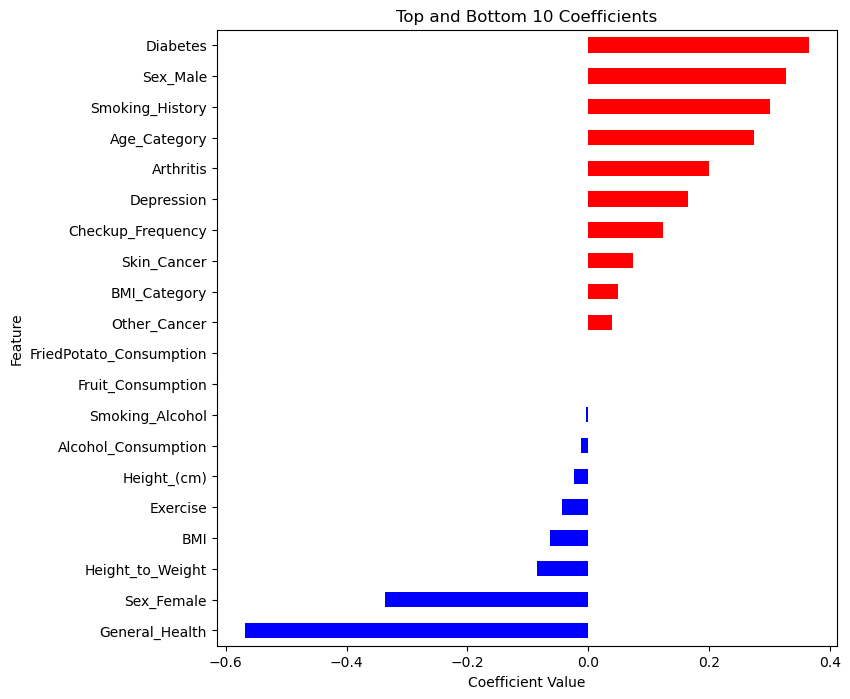

In [33]:
plt.figure(figsize=(8, 8))
colors = ['blue'] * 10 + ['red'] * 10
combined_coefficients.sort_values().plot(kind='barh', color=colors)

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top and Bottom 10 Coefficients')
plt.show()

# Decision Tree

In [34]:
X = data.drop(['Heart_Disease'],axis=1)
y = data['Heart_Disease']

In [35]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

tree_classifier = DecisionTreeClassifier()

dtreeCV = GridSearchCV(tree_classifier,
                      param_grid=param_grid,
                      return_train_score=True,
                      n_jobs=-1)
dtreeCV.fit(X, y)

best_params = dtreeCV.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 6, 'min_samples_split': 2}


In [36]:
#dtree = DecisionTreeClassifier()

In [37]:
best_tree_model = dtreeCV.best_estimator_

In [39]:
accuracy_scores = cross_val_score(best_tree_model, X, y, cv=5, scoring='accuracy')
average_accuracy = accuracy_scores.mean()
average_accuracy

0.9195495735340076

In [40]:
#dtree.fit(X, y)

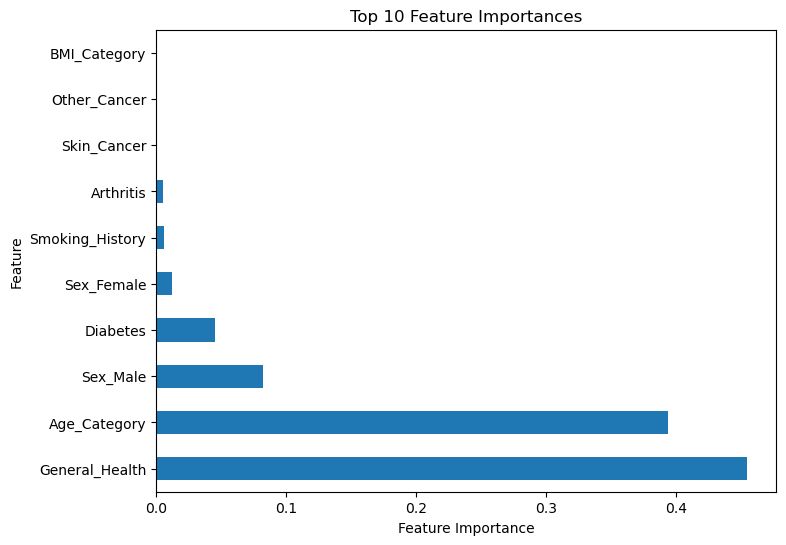

In [41]:
feature_importances = pd.Series(best_tree_model.feature_importances_, index=X.columns)
top_10_importances = feature_importances.sort_values(ascending=False).head(10)
top_10_importances.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [48]:
tree = export_text(best_tree_model, feature_names=list(X.columns))